# 處理 outliers
* 新增欄位註記
* outliers 或 NA 填補
    1. 平均數 (mean)
    2. 中位數 (median, or Q50)
    3. 最大/最小值 (max/min, Q100, Q0)
    4. 分位數 (quantile)

In [55]:
# Import 需要的套件
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

# 設定 data_path
dir_data = 'C:/Users/PERO/2nd-ML100Days/practice/data'

In [56]:
f_app = os.path.join(dir_data, 'application_train.csv')
print('Path of read in data: %s' % (f_app))
app_train = pd.read_csv(f_app)
app_train.head()

Path of read in data: C:/Users/PERO/2nd-ML100Days/practice/data\application_train.csv


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


## 1. 列出 AMT_ANNUITY 的 q0 - q100
## 2.1 將 AMT_ANNUITY 中的 NAs 暫時以中位數填補
## 2.2 將 AMT_ANNUITY 的數值標準化至 -1 ~ 1 間
## 3. 將 AMT_GOOD_PRICE 的 NAs 以眾數填補


In [71]:
"""
YOUR CODE HERE
"""
# 1: 計算 AMT_ANNUITY 的 q0 - q100
q_all =np.percentile(app_train[~app_train['AMT_ANNUITY'].isnull()]['AMT_ANNUITY'],q=list(range(101)))

quantile_100=pd.DataFrame({'q': list(range(101)),
              'value': q_all})
print(quantile_100)
print(app_train['AMT_ANNUITY'].value_counts().sort_index())

       q      value
0      0    1615.50
1      1    6183.00
2      2    6750.00
3      3    7875.00
4      4    8703.00
5      5    9000.00
6      6    9000.00
7      7    9556.65
8      8   10125.00
9      9   10503.00
10    10   11074.50
11    11   11430.00
12    12   11970.00
13    13   12375.00
14    14   12838.50
15    15   13302.00
16    16   13500.00
17    17   13500.00
18    18   13896.00
19    19   14350.50
20    20   14701.50
21    21   15124.50
22    22   15583.50
23    23   15970.50
24    24   16209.00
25    25   16524.00
26    26   16852.50
27    27   17113.50
28    28   17487.00
29    29   17806.50
..   ...        ...
71    71   32458.50
72    72   32895.00
73    73   33376.50
74    74   33984.00
75    75   34596.00
76    76   35343.00
77    77   35806.50
78    78   36328.50
79    79   36747.00
80    80   37516.50
81    81   37948.50
82    82   38556.00
83    83   39456.00
84    84   40131.00
85    85   40806.00
86    86   41841.00
87    87   42790.50
88    88   43735.50


In [72]:
# 2.1 將 NAs 以 q50 填補
print("Before replace NAs, numbers of row that AMT_ANNUITY is NAs: %i" % sum(app_train['AMT_ANNUITY'].isnull()))
    #null值的個數

"""
Your Code Here
"""


print('quantile_100[q=50].value: ',quantile_100[quantile_100['q']==50]['value'])
print('np.percentile(a,q=50):',np.percentile(app_train[~app_train['AMT_ANNUITY'].isnull()]['AMT_ANNUITY'],50))
#注意型別
'''
type(quantile_100[quantile_100['q']==50]['value']): series
type(np.percentile(app_train[~app_train['AMT_ANNUITY'].isnull()]['AMT_ANNUITY'],50)): numpy.float64

所以要寫成:
q_50 = quantile_100[quantile_100['q']==50]['value'].values
    or
q_50=np.percentile(app_train[~app_train['AMT_ANNUITY'].isnull()]['AMT_ANNUITY'],50)

'''

#q_50 = quantile_100[quantile_100['q']==50]['value'].values
q_50 =np.percentile(app_train[~app_train['AMT_ANNUITY'].isnull()]['AMT_ANNUITY'],50)

app_train.loc[app_train['AMT_ANNUITY'].isnull(),'AMT_ANNUITY'] = q_50
print("After replace NAs, numbers of row that AMT_ANNUITY is NAs: %i" % sum(app_train['AMT_ANNUITY'].isnull()))

Before replace NAs, numbers of row that AMT_ANNUITY is NAs: 0
quantile_100[q=50].value:  50    24903.0
Name: value, dtype: float64
np.percentile(a,q=50): 24903.0
After replace NAs, numbers of row that AMT_ANNUITY is NAs: 0


### Hints: Normalize function (to -1 ~ 1)
$ y = 2*(\frac{x - min(x)}{max(x) - min(x)} - 0.5) $

In [73]:
# 2.2 Normalize values to -1 to 1
print("== Original data range ==")
print(app_train['AMT_ANNUITY'].describe())

def normalize_value(x):
    """
    Your Code Here, compelete this function
    """
    x=2*(((x-app_train['AMT_ANNUITY'].min())/(app_train['AMT_ANNUITY'].max()-app_train['AMT_ANNUITY'].min()))-0.5)
    return x

app_train['AMT_ANNUITY_NORMALIZED'] = normalize_value(app_train['AMT_ANNUITY'])

print("== Normalized data range ==")
app_train['AMT_ANNUITY_NORMALIZED'].describe()

== Original data range ==
count    307511.000000
mean      27108.487841
std       14493.461065
min        1615.500000
25%       16524.000000
50%       24903.000000
75%       34596.000000
max      258025.500000
Name: AMT_ANNUITY, dtype: float64
== Normalized data range ==


count    307511.000000
mean         -0.801154
std           0.113049
min          -1.000000
25%          -0.883714
50%          -0.818357
75%          -0.742752
max           1.000000
Name: AMT_ANNUITY_NORMALIZED, dtype: float64

In [91]:
# 3
print("Before replace NAs, numbers of row that AMT_GOODS_PRICE is NAs: %i" % sum(app_train['AMT_GOODS_PRICE'].isnull()))

# 列出重複最多的數值
"""
Your Code Here
"""
value_most = app_train['AMT_GOODS_PRICE'].value_counts().index[0]
print(value_most)

mode_goods_price = list(app_train['AMT_GOODS_PRICE'].value_counts().index)
app_train.loc[app_train['AMT_GOODS_PRICE'].isnull(), 'AMT_GOODS_PRICE'] = mode_goods_price[0]

print("After replace NAs, numbers of row that AMT_GOODS_PRICE is NAs: %i" % sum(app_train['AMT_GOODS_PRICE'].isnull()))

Before replace NAs, numbers of row that AMT_GOODS_PRICE is NAs: 278
450000.0
After replace NAs, numbers of row that AMT_GOODS_PRICE is NAs: 0


## 練習

In [8]:
'''
np.percentile():
    大都用於去除outliers
    numpy.percentile(a, q, axis)
        a: array
        q: 要計算的百分位數，0~100
        axis:計算百分位數的軸，二維的話就是0和1
'''
a=np.array([[10, 7, 4], [3, 2, 1]])
print('a:\n',a)

print(np.percentile(a,50))
    #不指定axis, 此為a所有元素排序後的中位數，即1,2,3,4,7,10, 取(3+4)/2=3.5

print(np.percentile(a,50,axis=0))
    #axis=0為column方向，所以是[(10+3)/2, (7+2)/2, (4+1)/2]=[6.5 4.5 2.5]

print(np.percentile(a,50,axis=1))
    #axis=1為row方向，所以是[21/3, 6/3]=[7,2]

a:
 [[10  7  4]
 [ 3  2  1]]
3.5
[6.5 4.5 2.5]
[7. 2.]


In [18]:
#欲求出app_train['AMT_ANNUITY']的五個百分位數

print(app_train['AMT_ANNUITY'].isnull().head())
    #各欄位的值是否為Nan
print('\n')
print(app_train['AMT_ANNUITY'].isnull().value_counts())
    #Nan的個數
app_train[app_train['AMT_ANNUITY'].isnull()]
    #把app_train['AMT_ANNUITY']為空值的抓出來，包含其它欄位


0    False
1    False
2    False
3    False
4    False
Name: AMT_ANNUITY, dtype: bool


False    307499
True         12
Name: AMT_ANNUITY, dtype: int64


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
47531,155054,0,Cash loans,M,N,N,0,180000.0,450000.0,NaN,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,1.0
50035,157917,0,Cash loans,F,N,N,0,94500.0,450000.0,NaN,...,0,0,0,0,0.0,0.0,0.0,1.0,0.0,1.0
51594,159744,0,Cash loans,F,N,N,0,202500.0,539100.0,NaN,...,0,0,0,0,0.0,0.0,0.0,1.0,0.0,1.0
55025,163757,0,Cash loans,F,N,N,0,162000.0,296280.0,NaN,...,0,0,0,0,0.0,0.0,0.0,1.0,0.0,4.0
59934,169487,0,Cash loans,M,Y,N,0,202500.0,360000.0,NaN,...,0,0,0,0,0.0,0.0,1.0,0.0,0.0,6.0
75873,187985,0,Cash loans,M,Y,N,0,144000.0,219249.0,NaN,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,11.0
89343,203726,0,Cash loans,F,Y,N,0,90000.0,157500.0,NaN,...,0,0,0,0,0.0,0.0,0.0,2.0,0.0,0.0
123872,243648,0,Cash loans,F,N,Y,0,202500.0,929088.0,NaN,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,5.0
207186,340147,0,Cash loans,M,N,N,0,171000.0,486000.0,NaN,...,0,0,0,0,0.0,0.0,1.0,1.0,0.0,2.0
227939,364022,0,Cash loans,F,N,Y,0,315000.0,628069.5,NaN,...,0,0,0,0,0.0,0.0,1.0,0.0,0.0,2.0


In [20]:
app_train[~app_train['AMT_ANNUITY'].isnull()]['AMT_ANNUITY'].head()
    #app_train中'AMT_ANNUITY'欄位的值不為空的，只回傳'AMT_ANNUITY'欄位
    

0    24700.5
1    35698.5
2     6750.0
3    29686.5
4    21865.5
Name: AMT_ANNUITY, dtype: float64

In [22]:
#求app_train['AMT_ANNUITY']的5個百分位數的數值
five_num = [0, 25, 50, 75, 100]
quantile_5s=[]
for q in five_num:
    quantile_5s.append(np.percentile(app_train[~app_train['AMT_ANNUITY'].isnull()]['AMT_ANNUITY'],q))
print(quantile_5s)

'''
一行寫
quantile_5s = [np.percentile(app_train[~app_train['AMT_ANNUITY'].isnull()]['AMT_ANNUITY'], q = i) for i in five_num]
'''

[1615.5, 16524.0, 24903.0, 34596.0, 258025.5]


"\nquantile_5s = [np.percentile(app_train[~app_train['AMT_ANNUITY'].isnull()]['AMT_ANNUITY'], q = i) for i in five_num]\nprint(quantile_5s)\n"

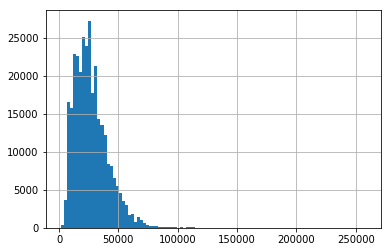

In [24]:
#畫出不為nul值的hist
app_train[~app_train['AMT_ANNUITY'].isnull()]['AMT_ANNUITY'].hist(bins=100)
    #分成100等份
plt.show()

In [49]:
print(quantile_100.head())
print(quantile_100[quantile_100['q']==50])
print(quantile_100[quantile_100['q']==50]['value'])

   q    value
0  0  1615.50
1  1  6182.91
2  2  6750.00
3  3  7875.00
4  4  8703.00
     q    value
50  50  24903.0
50    24903.0
Name: value, dtype: float64


In [92]:
#找出現最多次的數
type(app_train['AMT_GOODS_PRICE'].value_counts())
    #series
print(app_train['AMT_GOODS_PRICE'].value_counts().head())
'''
450000.0    26022
225000.0    25282
675000.0    24962
900000.0    15416
270000.0    11428
'''
print(list(app_train['AMT_GOODS_PRICE'].value_counts())[:10])
    #[26022, 25282, 24962, 15416, 11428, ...]
    #沒有index

app_train['AMT_GOODS_PRICE'].value_counts().index[0]

450000.0    26300
225000.0    25282
675000.0    24962
900000.0    15416
270000.0    11428
Name: AMT_GOODS_PRICE, dtype: int64
[26300, 25282, 24962, 15416, 11428, 10123, 9157, 9050, 8206, 5225]


450000.0